# **KNN**

## 1.1 Fundamentos de la técnica
El algoritmo k-Nearest Neighbors (kNN) es un método de aprendizaje supervisado que se utiliza principalmente para clasificación, aunque también puede emplearse en regresión. Su funcionamiento se basa en el principio de similitud: los objetos similares suelen encontrarse cerca entre sí en el espacio de características.

kNN es considerado un algoritmo no paramétrico porque no asume ninguna forma o distribución específica de los datos. Además, se clasifica como un "aprendiz perezoso" (lazy learner), ya que no aprende un modelo durante el entrenamiento, sino que almacena todo el conjunto de datos y realiza los cálculos necesarios solo cuando se requiere clasificar o predecir un nuevo ejemplo.

El proceso general de kNN consiste en los siguientes pasos:

* Calcular la distancia entre el nuevo punto y todos los puntos del conjunto de entrenamiento.
* Seleccionar los k vecinos más cercanos (los de menor distancia).
* En clasificación, el nuevo punto se asigna a la clase más común entre sus vecinos (mayoría de votos).
* En regresión, se calcula el promedio de los valores de salida de los vecinos.

El valor de k controla la complejidad del modelo:
* Si k es pequeño, el modelo puede ser muy sensible al ruido (overfitting).
* Si k es grande, el modelo puede volverse demasiado general (underfitting).

Por ello, la selección de k suele realizarse mediante métodos como validación cruzada (cross-validation) o el método del codo (elbow method).


## 1.2 Modelo Matemático
KNN utiliza métricas de distancia para identificar a los vecinos más cercanos, los cuales se emplean tanto en tareas de clasificación como de regresión.
Para determinar cuál es el vecino más cercano, se usan las siguientes métricas de distancia:

*Distancia euclidiana*

La distancia euclidiana se define como la distancia en línea recta entre dos puntos en un plano o en el espacio.
Puedes imaginarla como el camino más corto que recorrerías si fueras directamente de un punto a otro.

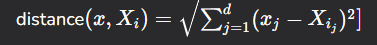

*Distancia Manhattan*

Esta es la distancia total que recorrerías si solo pudieras moverte a lo largo de líneas horizontales y verticales, como en una cuadrícula o en las calles de una ciudad.
También se le llama “distancia del taxista” (taxicab distance) porque un taxi solo puede desplazarse siguiendo el trazado en forma de cuadrícula de las calles.

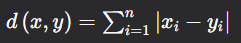

*Distancia Minkowski*

La distancia Minkowski es como una familia de medidas de distancia que incluye a la euclidiana y a la Manhattan como casos especiales.

Según su fórmula, cuando p = 2, se convierte en la distancia euclidiana, y cuando p = 1, se convierte en la distancia Manhattan.
En esencia, la distancia Minkowski es una fórmula flexible que puede representar tanto la distancia euclidiana como la Manhattan dependiendo del valor del parámetro p.

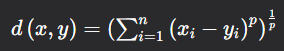

Esto con un conjunto de entrenamiento:

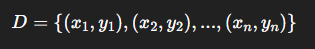

donde cada x representa un vector de características y 𝑦 la etiqueta o valor asociado.


## 1.3 Descripción de la librería, clases, funciones (python) empleadas en programar KNN
En esta sección se describen las principales librerías, clases y funciones empleadas en la implementación del modelo k-Nearest Neighbors (kNN), así como su papel dentro del flujo de trabajo.

* NumPy (numpy): utilizada para la manipulación de arreglos numéricos y operaciones matemáticas esenciales, como la conversión de los datos de entrada en vectores y el cálculo de distancias entre puntos.

* Pandas (pandas): permitió organizar los datos del conjunto Iris en un DataFrame, facilitando su exploración, descripción estadística y manipulación mediante etiquetas de columnas.

* Matplotlib (matplotlib.pyplot): empleada para generar visualizaciones, como el gráfico de dispersión que muestra la distribución de las especies según sus características, y la matriz de confusión que permite evaluar visualmente el rendimiento del modelo.

* Scikit-learn (sklearn): es la librería principal para la implementación del modelo y contiene los módulos utilizados en este proyecto:

* datasets.load_iris: carga el conjunto de datos Iris, un dataset clásico para clasificación supervisada.

* model_selection.train_test_split: divide los datos en subconjuntos de entrenamiento (75%) y prueba (25%), garantizando una evaluación objetiva del modelo.

* preprocessing.StandardScaler: estandariza las características para que todas tengan una media cero y desviación estándar uno, mejorando el desempeño del modelo kNN.

* neighbors.KNeighborsClassifier: clase que implementa el algoritmo k-Nearest Neighbors, el cual clasifica una muestra según las clases mayoritarias de sus k vecinos más cercanos. En este caso, se utilizó k = 5.

* metrics.accuracy_score: calcula la exactitud del modelo, es decir, el porcentaje de predicciones correctas sobre el total.

* metrics.confusion_matrix y metrics.ConfusionMatrixDisplay: generan y visualizan la matriz de confusión, mostrando la distribución de aciertos y errores entre las clases predichas y las reales.

* Función personalizada predict_sample(): se definió para probar el modelo con un solo ejemplo, aplicando la misma escala que en el entrenamiento y mostrando tanto el número de clase predicho como su nombre correspondiente.

En conjunto, estas librerías y funciones permiten realizar un flujo completo de trabajo de aprendizaje supervisado: desde la carga y normalización de datos hasta el entrenamiento, evaluación y visualización de resultados del modelo de clasificación.

## 1.4 Pipeline


#### Preprocesamiento

En esta sección del código se realiza el preprocesamiento de los datos del conjunto Iris. Primero, se cargan las características y las etiquetas del dataset utilizando la función load_iris() de scikit-learn. Posteriormente, los datos se organizan en un DataFrame de Pandas para facilitar su análisis. A través del método describe(), se obtiene un análisis estadístico descriptivo que incluye medidas como el promedio, desviación estándar, valores mínimos y máximos, lo cual permite comprender mejor la distribución y escala de las variables antes de entrenar el modelo.

Además, se genera un gráfico de dispersión (scatter plot) para visualizar la relación entre dos características del conjunto de datos y observar cómo se agrupan las clases de flores en el espacio de características. Finalmente, se aplica una normalización o estandarización de los datos mediante StandardScaler, que ajusta las variables para que tengan media cero y desviación estándar uno. Este paso es esencial en algoritmos basados en distancias, como k-NN, ya que garantiza que todas las características contribuyan equitativamente al modelo. Luego, los datos se dividen en conjuntos de entrenamiento y prueba usando train_test_split, preparando así el conjunto de datos para las siguientes etapas del pipeline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda t: iris.target_names[t])
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


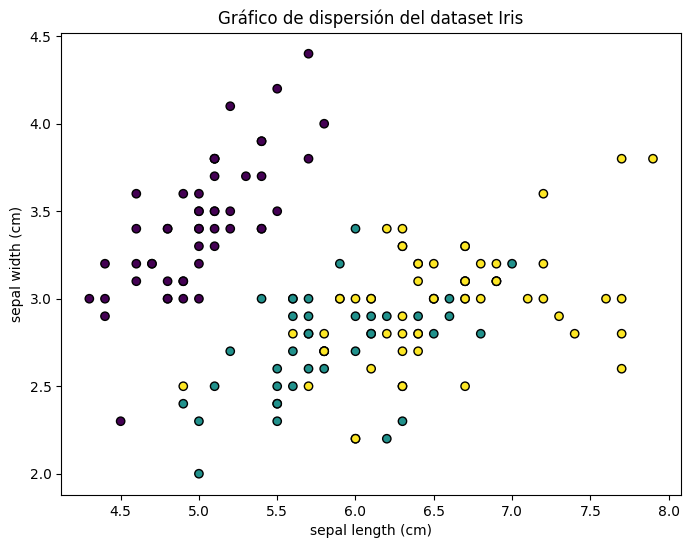

In [2]:
plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Gráfico de dispersión del dataset Iris")
plt.show()


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)


#### Prediction

En esta sección se lleva a cabo la fase de predicción dentro del pipeline del modelo k-NN. Primero, se crea y entrena un clasificador de vecinos más cercanos (k-Nearest Neighbors) mediante la clase KNeighborsClassifier de scikit-learn, utilizando k=5 como número de vecinos. Este valor indica que la clase de un nuevo punto se determinará considerando las cinco observaciones más cercanas en el espacio de características.

Posteriormente, se define la función predict_sample(), la cual permite predecir la clase de un patrón individual. La función recibe como entrada el modelo entrenado, el objeto escalador (StandardScaler) para normalizar el nuevo dato, y opcionalmente los nombres de las variables y clases. Internamente, la muestra se transforma con el mismo escalador usado durante el entrenamiento para mantener la coherencia en las escalas, y luego el modelo predice su clase.

Finalmente, se utiliza un ejemplo real del conjunto de datos (X[0]) para probar la función y mostrar tanto el vector de entrada como la clase predicha junto con su etiqueta correspondiente (nombre de la especie). Esta parte del código demuestra cómo el modelo puede generalizar y clasificar correctamente nuevas observaciones.

In [4]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

selected_features = iris.feature_names
print("Variables seleccionadas para el modelo:", selected_features)

Variables seleccionadas para el modelo: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:

def predict_sample(model, scaler, sample, feature_names=None, target_names=None):
    sample_scaled = scaler.transform(np.array(sample).reshape(1, -1))
    y_pred = model.predict(sample_scaled)[0]
    label = target_names[y_pred] if target_names is not None else str(y_pred)
    return y_pred, label


example = X[0]
y_pred, label = predict_sample(knn, scaler, example, iris.feature_names, iris.target_names)
print("Ejemplo de entrada:", example)
print(f"Predicción: clase {y_pred} ({label})")

Ejemplo de entrada: [5.1 3.5 1.4 0.2]
Predicción: clase 0 (setosa)


#### Model Evaluation

En esta última sección se realiza la evaluación del modelo, donde se mide el desempeño del clasificador k-NN aplicado a los datos de prueba.

Primero, el modelo genera las predicciones sobre el conjunto X_test mediante el método predict(). A continuación, se calcula la exactitud (accuracy) usando la función accuracy_score(), que representa el porcentaje de instancias correctamente clasificadas respecto al total de muestras evaluadas. Este valor sirve como una métrica global del rendimiento del modelo.

También se obtiene la matriz de confusión con confusion_matrix(), la cual muestra el número de predicciones correctas e incorrectas para cada clase. Esta matriz permite identificar en qué categorías el modelo tiene mejor desempeño y dónde tiende a equivocarse.

Finalmente, se visualiza la matriz de confusión de manera gráfica utilizando ConfusionMatrixDisplay, con un esquema de color azul para facilitar su interpretación. Esta visualización ofrece una comprensión más clara de cómo el modelo clasifica cada especie del dataset Iris y complementa el valor del accuracy con información más detallada sobre los aciertos y errores de clasificación.

Accuracy del modelo: 0.9211
Matriz de confusión:
 [[12  0  0]
 [ 0 13  0]
 [ 0  3 10]]


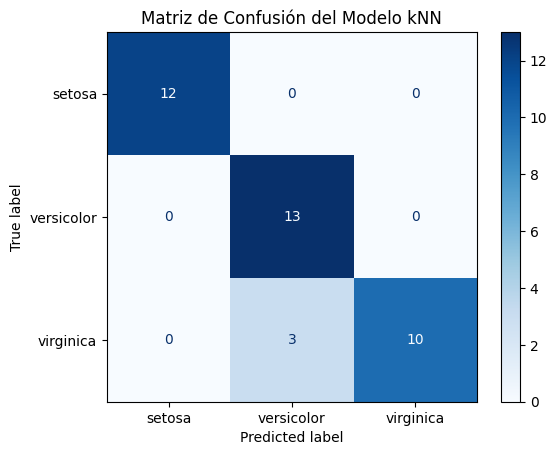

In [6]:

y_pred_test = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

print(f"Accuracy del modelo: {acc:.4f}")
print("Matriz de confusión:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión del Modelo kNN")
plt.show()


# Referencias
* GeeksforGeeks. (2025, 23 agosto). KNeArest Neighbor(KNN) algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/

